<a href="https://colab.research.google.com/github/Shalinivijayravikumar/SQL-PROJECT/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains synthetic data simulating customer behavior for a Netflix-like video streaming service. It includes 5,000 records with 14 carefully engineered features designed for churn prediction modeling, business insights, and customer segmentation.

The dataset is ideal for:

Machine learning classification tasks (churn vs. non-churn)

Exploratory data analysis (EDA)

Customer behavior modeling in OTT platforms

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).¶

### Import libraries and load data

In [341]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [342]:
os.getcwd()

'/content'

In [343]:
print("Current directory:", os.getcwd())

Current directory: /content


In [344]:
os.chdir('/content')

In [345]:
os.getcwd()

'/content'

In [346]:
from google.colab import files
uploaded = files.upload()

Saving netflix_customer_churn.csv to netflix_customer_churn (4).csv


In [347]:
import pandas as pd
df = pd.read_csv("netflix_customer_churn.csv")

### LOAD THE DATA

In [348]:
df=pd.read_csv("netflix_customer_churn.csv")

### Checking the data

In [349]:
df.tail()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi
4999,82aeef39-ddb0-40ad-bae1-5c436e0cf042,57,Male,Basic,1.62,17,Africa,Mobile,8.99,1,Crypto,2,0.09,Action


In [350]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


Insights 7 variables and 210 records.

No missing record based on intial analysis.

All the variables numeric type.

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [352]:
## data frame has 210 rows and 14 columns,not having any missing values.

In [353]:
df.shape

(5000, 14)

In [354]:
df.nunique()

,0
customer_id,5000
age,53
gender,3
subscription_type,3
watch_hours,2343
last_login_days,61
region,6
device,5
monthly_fee,3
churned,2


In [355]:
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

gender unique values: ['Other' 'Female' 'Male']
subscription_type unique values: ['Basic' 'Standard' 'Premium']
region unique values: ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
device unique values: ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
payment_method unique values: ['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']
favorite_genre unique values: ['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']


In [356]:
df.dtypes

,0
customer_id,object
age,int64
gender,object
subscription_type,object
watch_hours,float64
last_login_days,int64
region,object
device,object
monthly_fee,float64
churned,int64


In [357]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [358]:
# checking duplicates

In [359]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [360]:
# this dataset has no duplicate rows

In [361]:
##  checking outliers

In [362]:
## using the IQR METHOD,CHECKING THE OUTLIER FOR CONTINOUS COLUMN

In [363]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [customer_id, age, gender, subscription_type, watch_hours, last_login_days, region, device, monthly_fee, churned, payment_method, number_of_profiles, avg_watch_time_per_day, favorite_genre]
Index: []


In [364]:
df['age'].describe()

,age
count,5000.000000
mean,43.847400
std,15.501128
min,18.000000
25%,30.000000
50%,44.000000
75%,58.000000
max,70.000000


In [365]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [366]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [367]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]


Number of duplicate rows = 0


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre


In [368]:
## here am dropping unwanted column "customer_id"

In [369]:
df = df.drop('customer_id', axis=1)

In [370]:
## CHECKING THE OUTLIER FOR CONTINOUS COLUMN

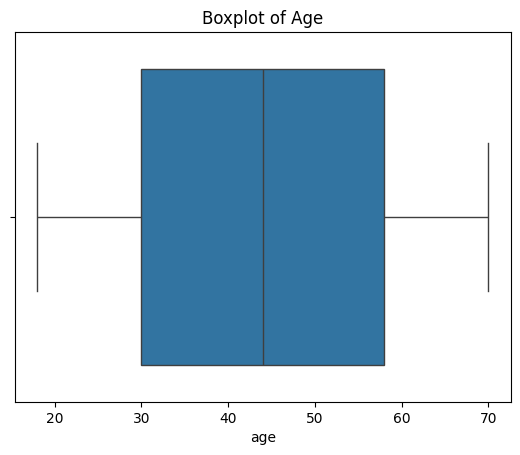

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'age' column
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

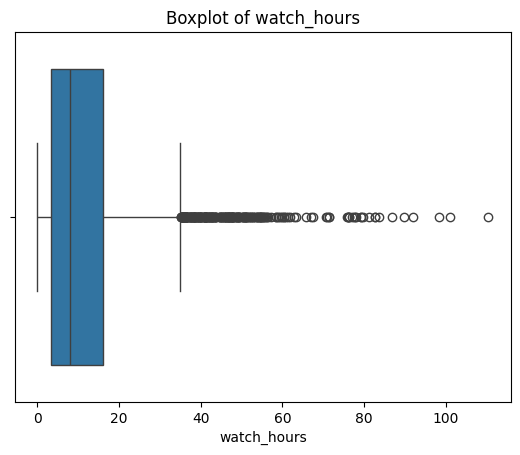

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'watch_hours' column
sns.boxplot(x=df['watch_hours'])
plt.title('Boxplot of watch_hours')
plt.show()

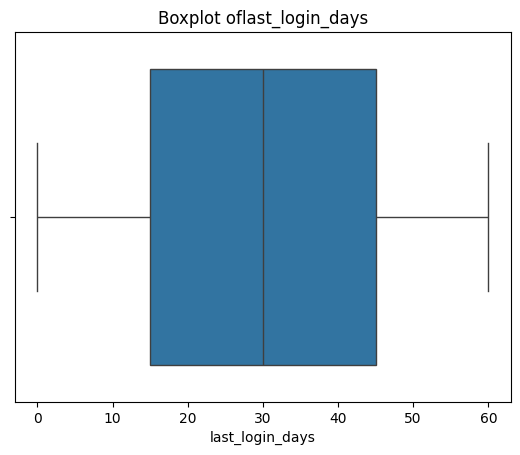

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'last_login_days' column
sns.boxplot(x=df['last_login_days'])
plt.title('Boxplot oflast_login_days')
plt.show()

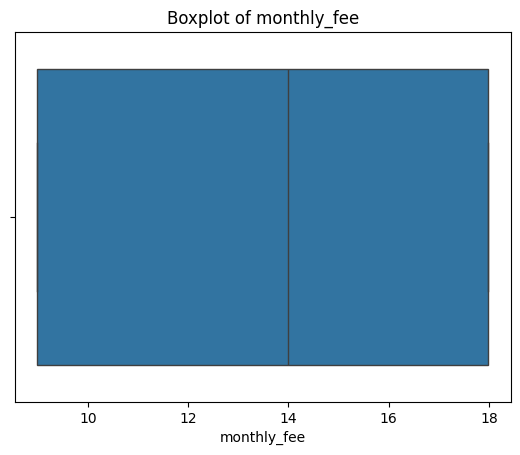

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'monthly_fee' column
sns.boxplot(x=df['monthly_fee'])
plt.title('Boxplot of monthly_fee')
plt.show()

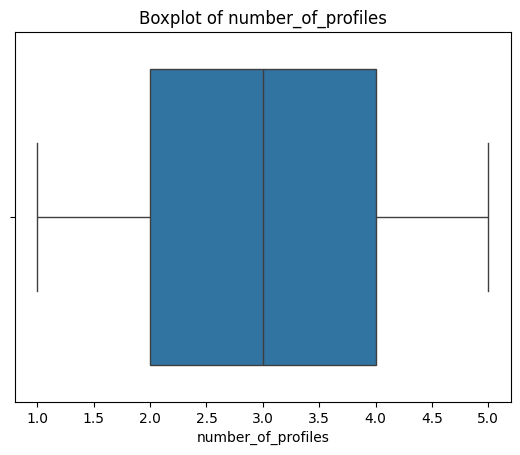

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'number_of_profiles' column
sns.boxplot(x=df['number_of_profiles'])
plt.title('Boxplot of number_of_profiles')
plt.show()

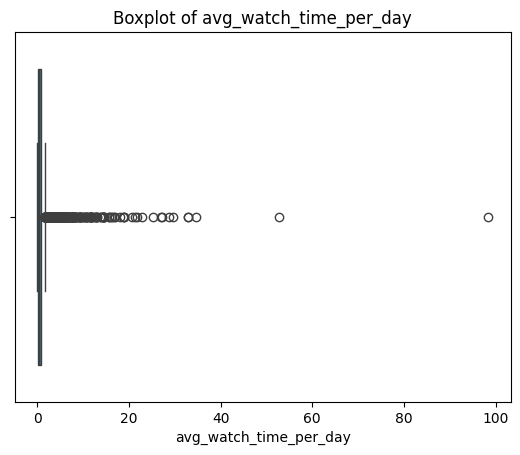

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'avg_watch_time_per_day' column
sns.boxplot(x=df['avg_watch_time_per_day'])
plt.title('Boxplot of avg_watch_time_per_day')
plt.show()

In [377]:
## CHECKING THE OUTLIER FOR CONTINOUS COLUMN

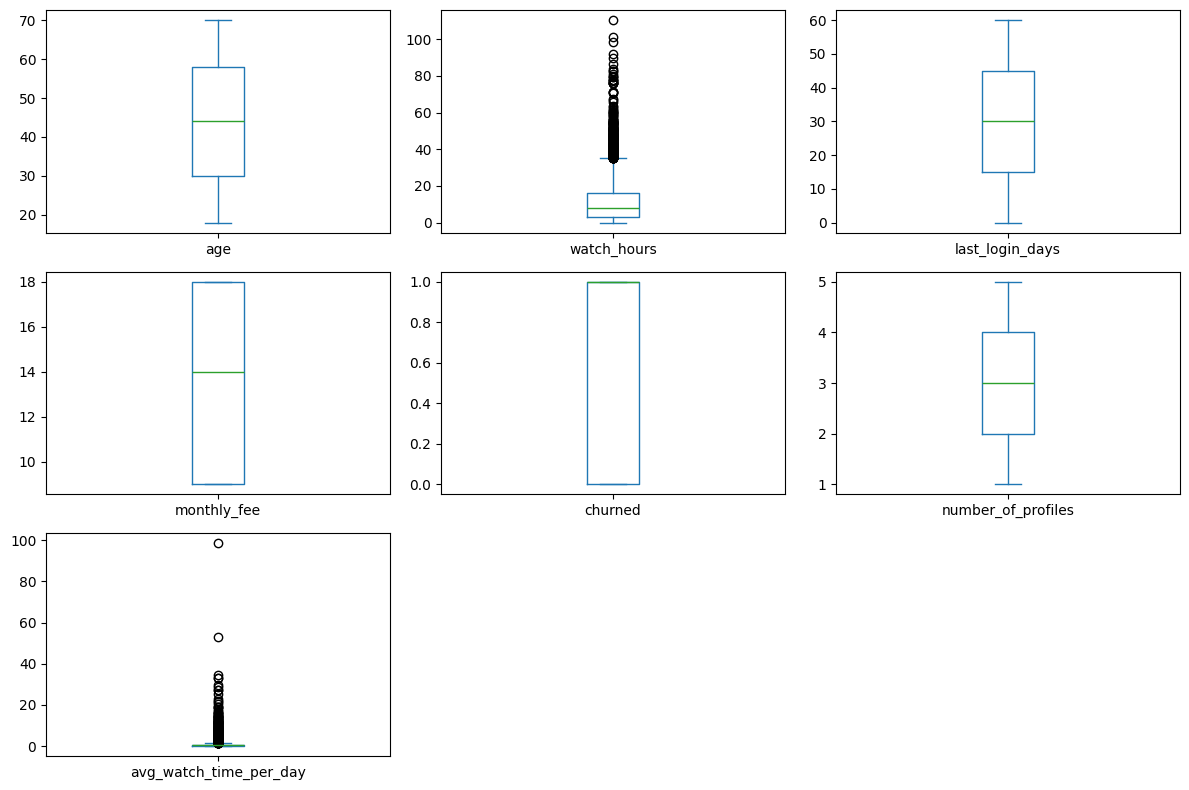

In [378]:
# Only plot boxplots for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Make boxplots
numeric_cols.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [379]:
## in continous variable ,some column has outlier those are watch hours and avg_watch_time_per_day

In [380]:
##   CHECKING THE OUTLIER FOR  categorical  COLUMN

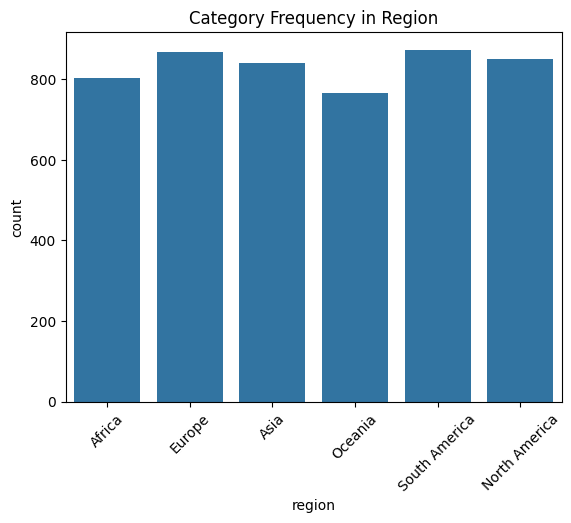

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='region', data=df)
plt.title('Category Frequency in Region')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

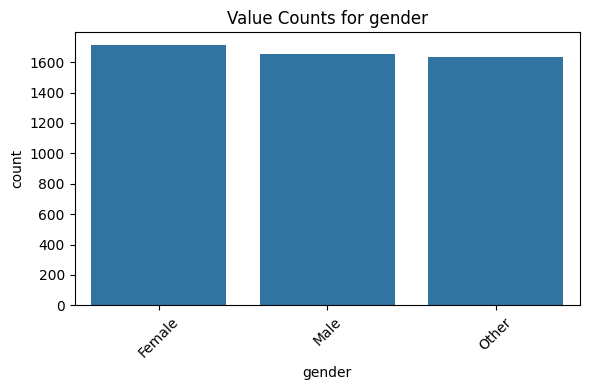

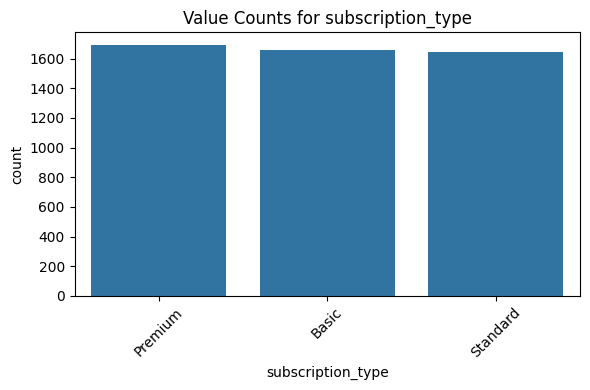

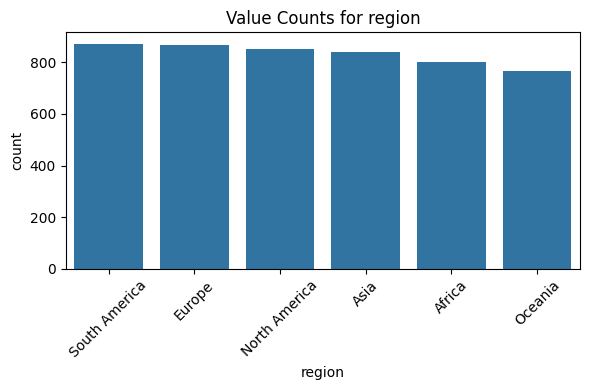

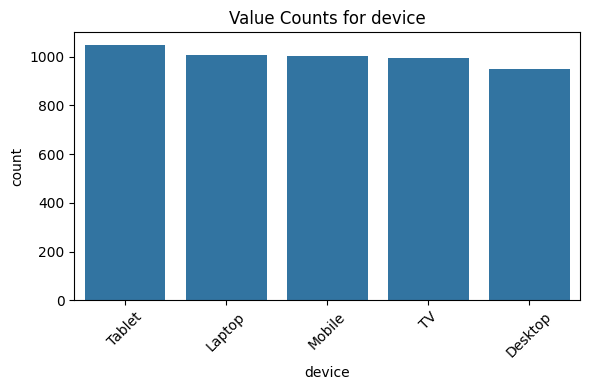

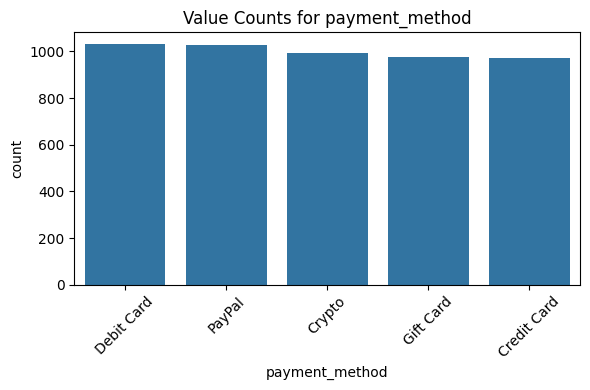

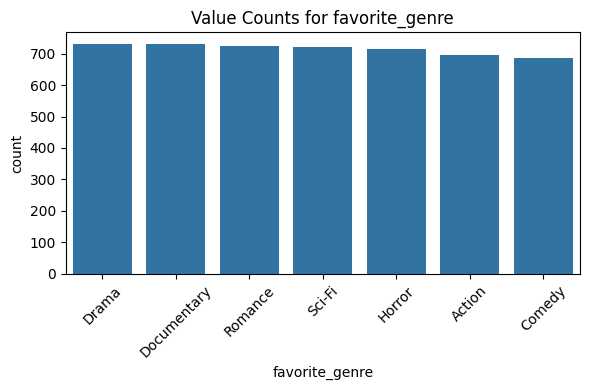

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Create bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Value Counts for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [383]:
# Conclusion based on categorical bar plots:
# After visualizing the distribution of categories within each categorical column using bar plots, it is observed that the heights of the bars for each category are relatively consistent or show a clear distribution without any isolated or extremely small bars compared to others. This indicates that there are no categories that appear significantly less frequently than others in a way that would suggest an outlier.
# Therefore, based on the bar plots, there are no apparent outliers in the categorical columns.

In [384]:
## While checking for outliers in the categorical column, it appears there are no outliers, as the bar plot shows the heights are evenly or highly distributed..

In [385]:
## below checking the distribution of the numerical variables for each continuos column

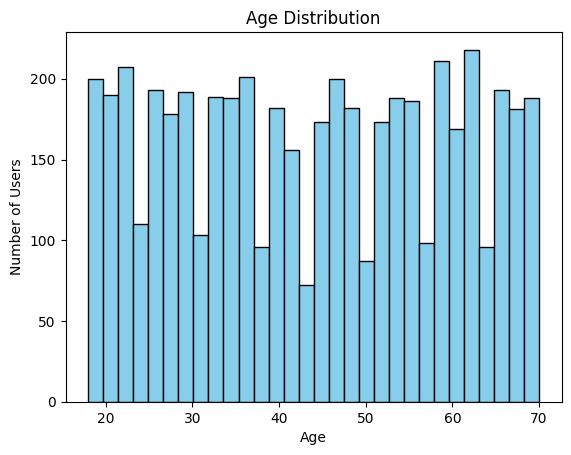

In [386]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

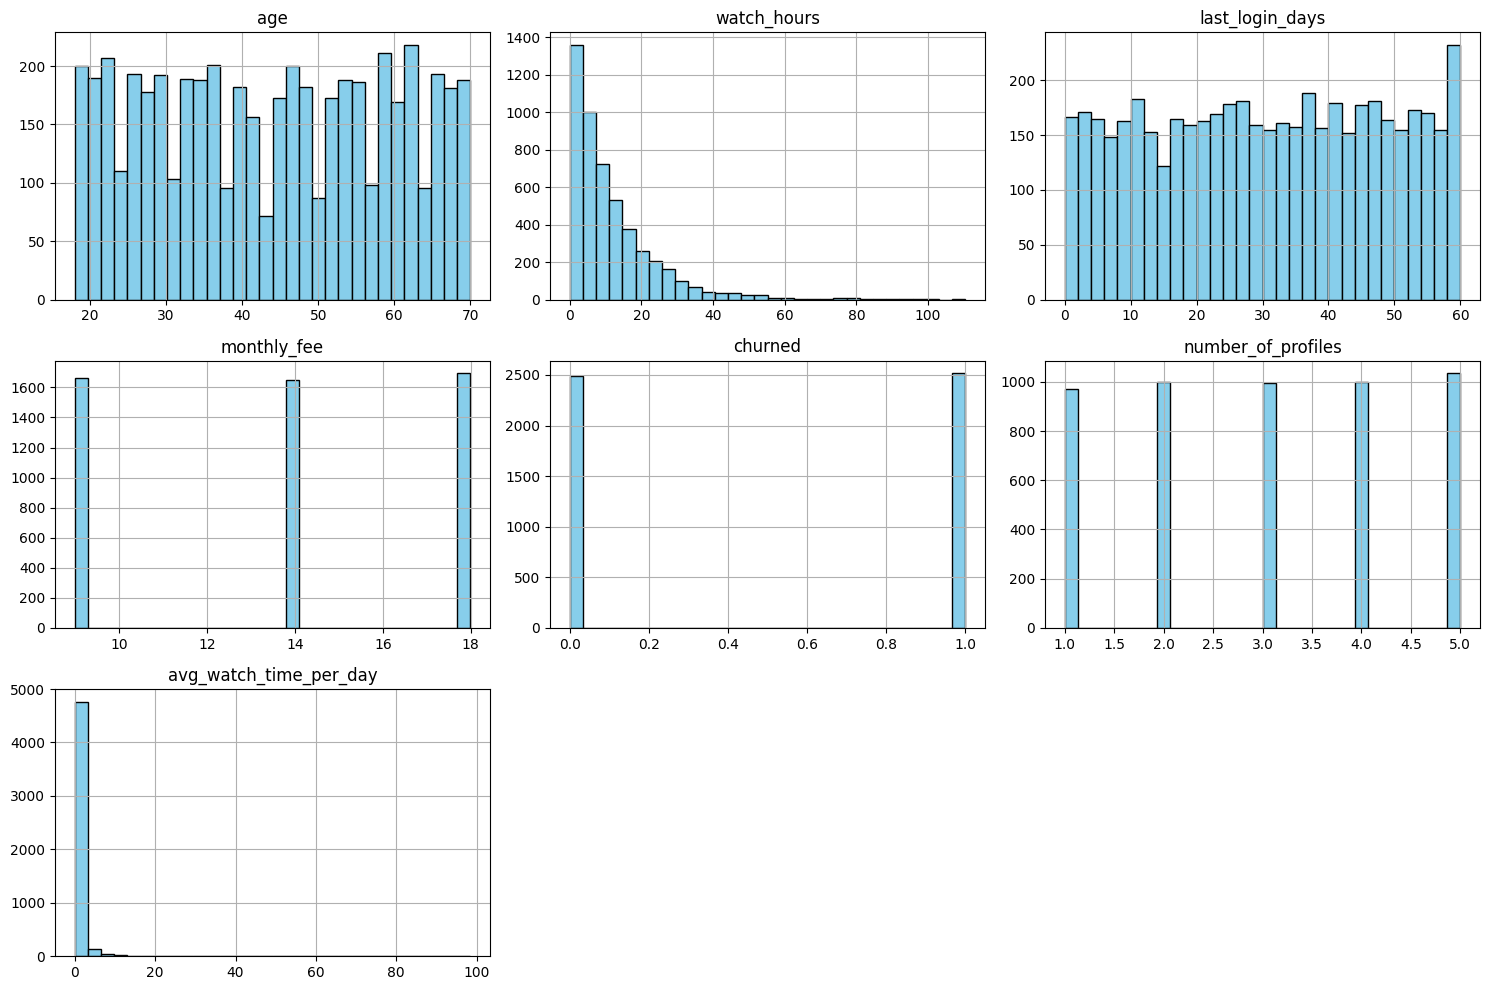

In [387]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

In [388]:
## below checking the distribution for  the categorical column

In [389]:
# Separate columns by data type
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:")
for col in categorical_cols:
    print(col)

print("\nContinuous (numeric) columns:")
for col in numeric_cols:
    print(col)

Categorical columns:
gender
subscription_type
region
device
payment_method
favorite_genre

Continuous (numeric) columns:
age
watch_hours
last_login_days
monthly_fee
churned
number_of_profiles
avg_watch_time_per_day


In [390]:
df['gender'].value_counts()

,count
gender,
Female,1711
Male,1654
Other,1635


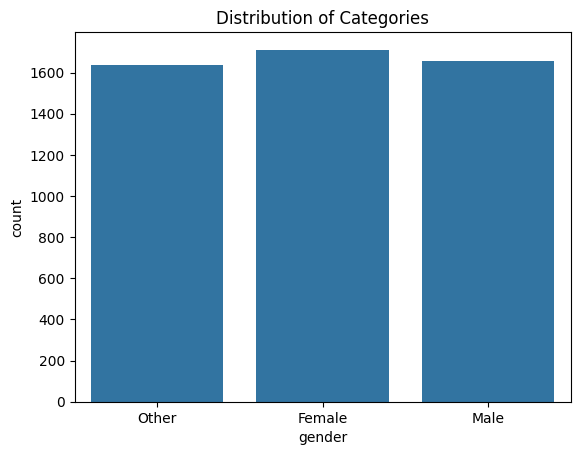

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df)
plt.title('Distribution of Categories')
plt.show()

In [392]:
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in continuous_cols:
    print(f"Distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

Distribution for column: age
age
63    111
24    110
18    108
22    108
59    108
62    107
46    105
36    105
29    104
54    104
31    103
58    103
66     99
23     99
26     99
51     98
57     98
20     98
49     97
56     97
33     97
44     97
64     96
38     96
35     96
28     96
37     96
69     95
40     95
47     95
65     94
25     94
70     93
21     92
68     92
34     92
32     92
19     92
67     89
55     89
30     88
50     87
39     87
48     85
61     85
41     84
60     84
53     84
27     82
45     76
52     75
42     72
43     72
Name: count, dtype: int64


Distribution for column: watch_hours
watch_hours
0.24     11
0.12     10
4.69      9
4.12      9
3.05      9
         ..
13.32     1
7.87      1
33.71     1
23.24     1
8.76      1
Name: count, Length: 2343, dtype: int64


Distribution for column: last_login_days
last_login_days
37    102
16    100
46     98
44     96
10     94
     ... 
38     68
19     68
17     65
15     62
14     60
Name: count, Length

In [393]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

Distribution for column: gender
gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64


Distribution for column: subscription_type
subscription_type
Premium     1693
Basic       1661
Standard    1646
Name: count, dtype: int64


Distribution for column: region
region
South America    873
Europe           867
North America    851
Asia             841
Africa           803
Oceania          765
Name: count, dtype: int64


Distribution for column: device
device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64


Distribution for column: payment_method
payment_method
Debit Card     1030
PayPal         1026
Crypto          995
Gift Card       976
Credit Card     973
Name: count, dtype: int64


Distribution for column: favorite_genre
favorite_genre
Drama          731
Documentary    729
Romance        725
Sci-Fi         720
Horror         713
Action         697
Comedy         685
Name: count, dtype: int64




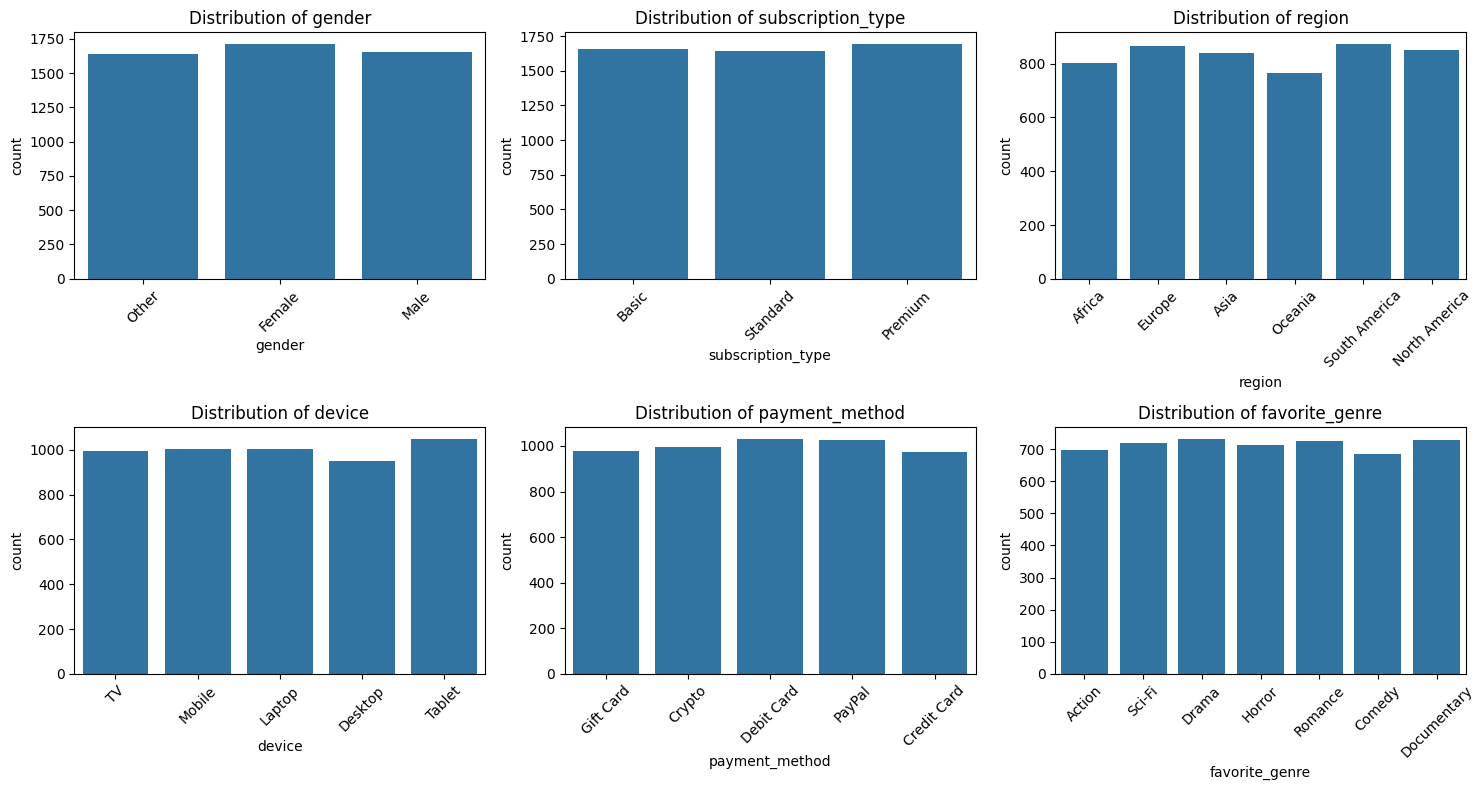

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Set number of columns for the subplot grid
n_cols = 3  # set how many plots you want per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols #calculate how many rows you want based on catergorical column

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [395]:
# In the above count plots, each category appears with similar frequency across different columns in the dataset.

In [396]:
# removing outliers for 'watch_hours', 'avg_watch_time_per_day column,the reason for removing outliers before encoding it affects accuracy of the model.

In [397]:
def remove_outliers_iqr_exclude_target(df, target_column):
    numeric_cols = df.select_dtypes(include='number').columns
    # Exclude the target column
    numeric_cols = [col for col in numeric_cols if col != target_column]
    df_clean = df.copy()

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Usage example:
# df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')


In [398]:
# Make sure this function and line are run before your plotting code
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

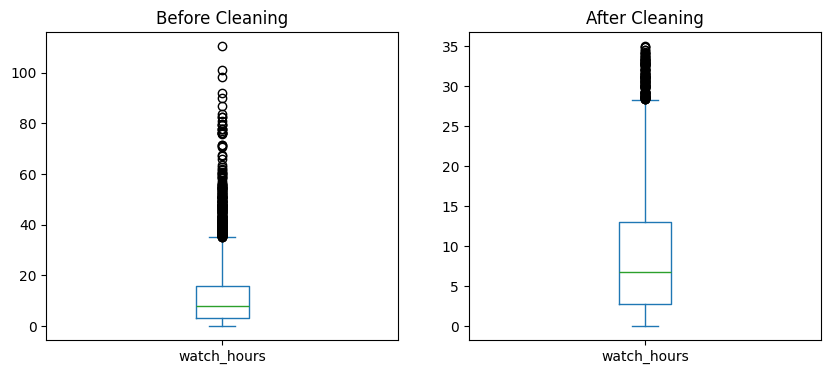

In [399]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['watch_hours'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['watch_hours'].plot.box(title='After Cleaning')
plt.show()


In [400]:
def count_outliers_column(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Usage example:
column_name = 'watch_hours'  # Change this to your desired column
outlier_count = count_outliers_column(df, column=column_name)
print(f"Number of outliers in '{column_name}': {outlier_count}")

Number of outliers in 'watch_hours': 238


In [401]:
def remove_outliers_iqr_exclude_target(df, target_column):
    numeric_cols = df.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != target_column]
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.75 * IQR
        upper_bound = Q3 + 0.75* IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


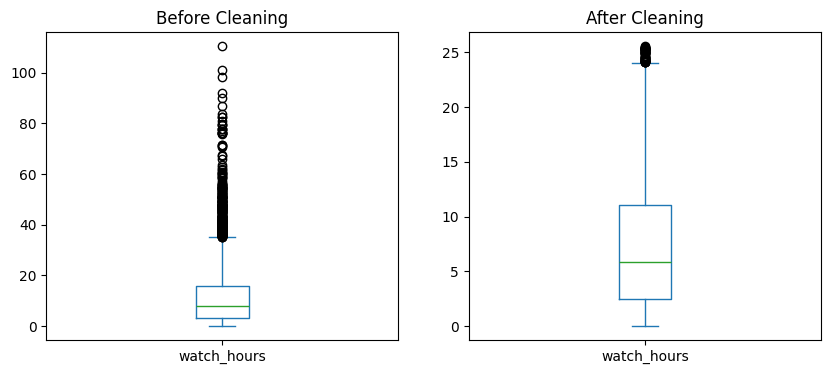

In [402]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['watch_hours'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['watch_hours'].plot.box(title='After Cleaning')
plt.show()

In [403]:
df.shape

(5000, 13)

In [404]:
def remove_outliers_iqr_exclude_target(df, target_column):
    numeric_cols = df.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != target_column]
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.75 * IQR
        upper_bound = Q3 + 0.75 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

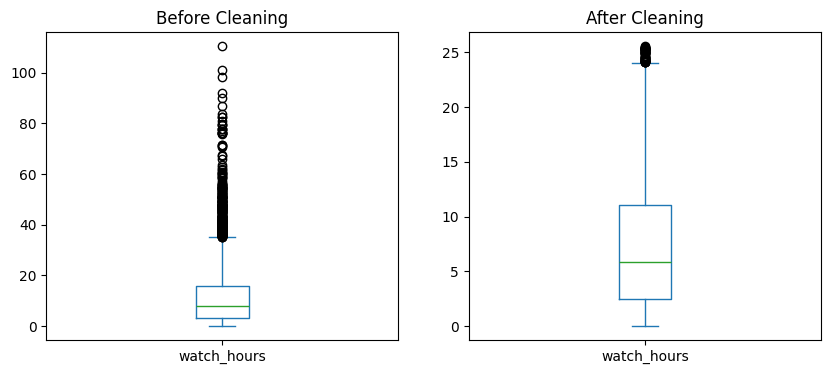

In [405]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['watch_hours'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['watch_hours'].plot.box(title='After Cleaning')
plt.show()

In [406]:
def count_outliers_column(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Usage example:
column_name = 'watch_hours'  # Change this to your desired column
outlier_count = count_outliers_column(df, column=column_name)
print(f"Number of outliers in '{column_name}': {outlier_count}")

Number of outliers in 'watch_hours': 238


In [407]:
def count_outliers_iqr(df, target_column=None):
    numeric_cols = df.select_dtypes(include='number').columns
    if target_column:
        numeric_cols = [col for col in numeric_cols if col != target_column]
    outlier_counts = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Usage:
# outliers_remaining = count_outliers_iqr(df, target_column='churn')
# print(outliers_remaining)


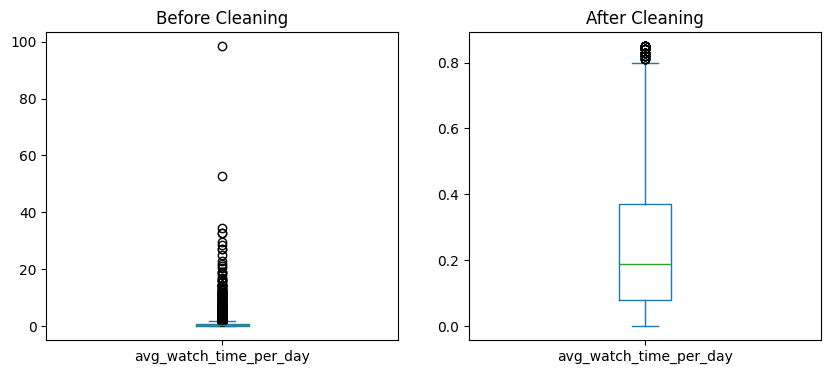

In [408]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['avg_watch_time_per_day'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['avg_watch_time_per_day'].plot.box(title='After Cleaning')
plt.show()

In [409]:
def count_outliers_column(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Usage example:
column_name = 'avg_watch_time_per_day'  # Change this to your desired column
outlier_count = count_outliers_column(df, column=column_name)
print(f"Number of outliers in '{column_name}': {outlier_count}")

Number of outliers in 'avg_watch_time_per_day': 549


In [410]:
def count_outliers_iqr(df, target_column=None):
    numeric_cols = df.select_dtypes(include='number').columns
    if target_column:
        numeric_cols = [col for col in numeric_cols if col != target_column]
    outlier_counts = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.75 * IQR
        upper_bound = Q3 + 0.75 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Usage:
# outliers_remaining = count_outliers_iqr(df, target_column='churn')
# print(outliers_remaining)

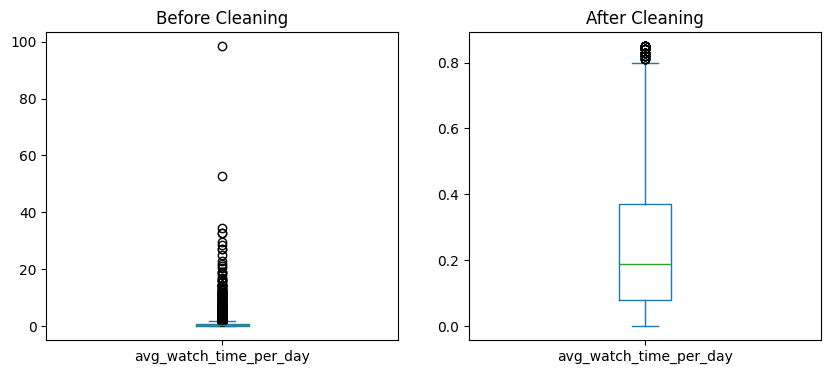

In [411]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['avg_watch_time_per_day'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['avg_watch_time_per_day'].plot.box(title='After Cleaning')
plt.show()

In [412]:
def count_outliers_column(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Usage example:
column_name = 'avg_watch_time_per_day'  # Change this to your desired column
outlier_count = count_outliers_column(df, column=column_name)
print(f"Number of outliers in '{column_name}': {outlier_count}")

Number of outliers in 'avg_watch_time_per_day': 549


In [413]:
wwwwww

NameError: name 'wwwwww' is not defined